**ZADANIE 1**

In [20]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

def f(x):
  return x*x + 2*x

def metodaTrapezow(a, b, n):
    dx = (b - a) / n
    s = 0
    for i in range(1, n):
      s += f(a + i * dx)
    s = (s + (f(a) + f(b)) / 2) * dx
    return s

def metodaProstokatow(a, b, n):
    dx = (b - a) / n
    s = 0
    for i in range(1, n):
      s += f(a + i * dx)
    s *= dx
    return s

def metodaSimpsona(a, b, n):
  s = 0
  st = 0
  dx = (b - a) /n
  for i in range(1, n):
    x = a + i * dx
    st += f(x - dx / 2)
    if(i < n):
      s += f(x)
  s = dx / 6 * (f(a) + f(b) + 2 * s + 4 * st)
  return s

print('Metoda trapezów ', metodaTrapezow(0.0, 1.0, 1000))
print('Metoda prostokątów ', metodaProstokatow(0.0, 1.0, 1000))
print('Metoda Simpsona ', metodaSimpsona(0.0, 1.0, 1000))



Metoda trapezów  1.3333334999999997
Metoda prostokątów  1.3318334999999997
Metoda Simpsona  1.3313346665


**ZADANIE 2**

In [39]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([0.0, 8.0, 6.0, 0.0, -4.0, 0.0], dtype=float)
model.fit(xs, ys, epochs=500)
print(model.predict([10.0]))

Epoch 1/500
1/1 [==============================] - 0s 205ms/step - loss: 19.3443
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 19.1055
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 18.8920
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 18.6988
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 18.5222
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 18.3590
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 18.2070
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 18.0643
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 17.9293
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 17.8008
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 17.6780
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 17.5600
Epoch 13/500
1/1 [=============================

**ZADANIE 3**

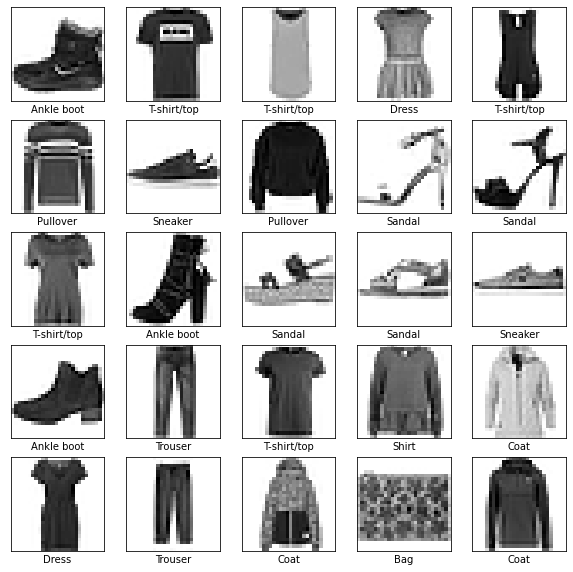

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6311 - accuracy: 0.7804
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3794 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3401 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3189 - accuracy: 0.8836
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2940 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2711 - accuracy: 0.8999
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2688 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2494 - accuracy: 0.9082
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2413 - accuracy: 0.9100
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [35]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0

test_images = test_images / 255.0


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.








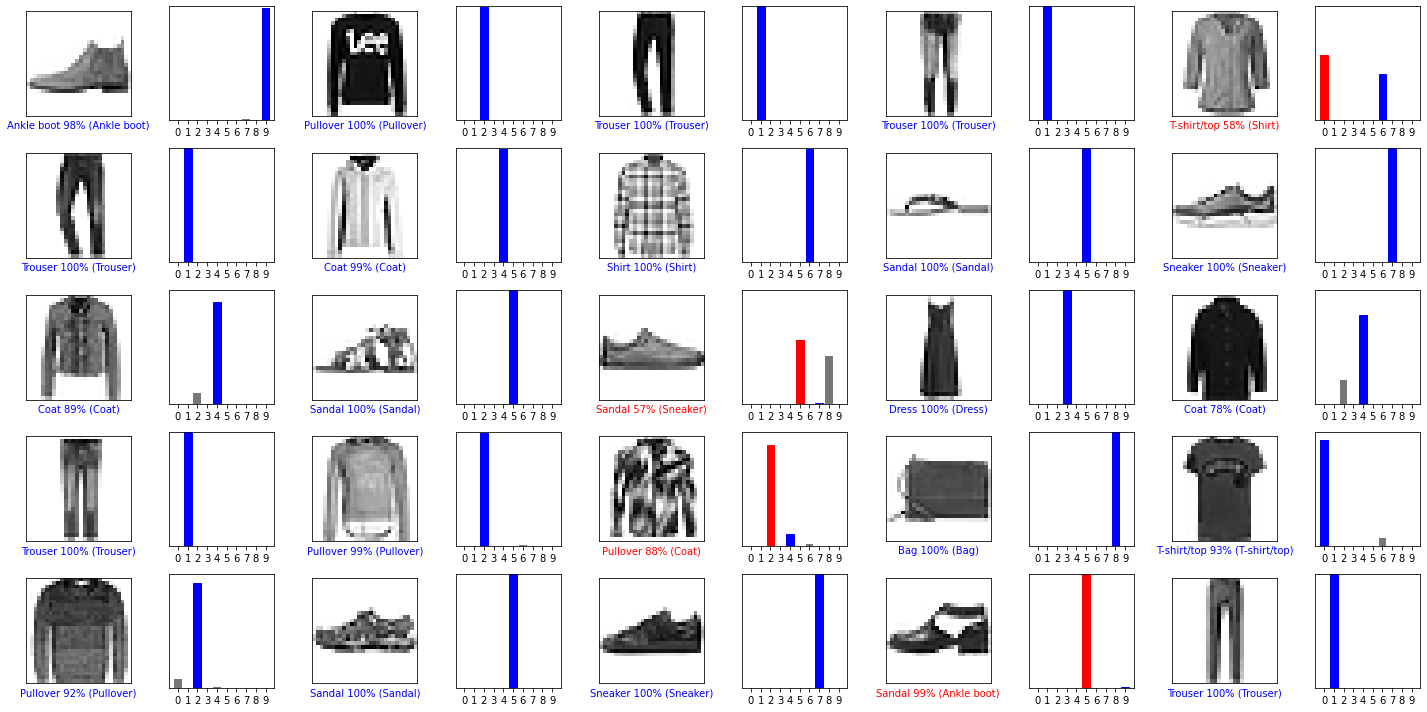

In [36]:


num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [38]:
from collections import Counter
wrong_ones = []
for i in range(test_labels.size):
  if(test_labels[i] != (np.argmax(predictions[i]))):
    wrong_ones.append((class_names[int(test_labels[i])]))

count_of_wrong_ones = Counter(wrong_ones)
count_of_wrong_ones.keys()
max_val = 0
max_key = ""
for key, value in count_of_wrong_ones.items():
  print(str(value) + " błednych predykcji na 1000 przedmiotów [" + key + "]")
  if( max_val < value):
    max_val = value
    max_key = key

print("Ten klasyfikator ma najwiekszy problem z predykcja przedmiotu [" + max_key + "]")





456 błednych predykcji na 1000 przedmiotów [Shirt]
60 błednych predykcji na 1000 przedmiotów [Sneaker]
185 błednych predykcji na 1000 przedmiotów [Coat]
36 błednych predykcji na 1000 przedmiotów [Ankle boot]
79 błednych predykcji na 1000 przedmiotów [Dress]
162 błednych predykcji na 1000 przedmiotów [Pullover]
116 błednych predykcji na 1000 przedmiotów [T-shirt/top]
28 błednych predykcji na 1000 przedmiotów [Trouser]
24 błednych predykcji na 1000 przedmiotów [Bag]
33 błednych predykcji na 1000 przedmiotów [Sandal]
Ten klasyfikator ma najwiekszy problem z predykcja przedmiotu [Shirt]
